In [113]:
import numpy as np
import pandas as pd
import openturns as ot
import openturns.viewer as viewer
import math
from matplotlib import pylab as plt

In [114]:
import modelib

In [169]:
#fp = 'small_ints.txt'
# for histogram in openturns, don't give counts
# giv raw sizes
fp = 'arch/data/intron.txt'
data = modelib.get_intbins(fp, 500)[2]
print(data)

[53, 121, 47, 49, 73, 42, 98, 89, 154, 47, 274, 95, 46, 82, 165, 47, 52, 180, 659, 1170, 48, 563, 53, 371, 46, 45, 46, 53, 528, 71, 59, 146, 241, 44, 50, 104, 43, 83, 44, 962, 429, 1173, 5862, 1301, 92, 436, 49, 285, 52, 299, 48, 56, 47, 46, 541, 43, 151, 486, 45, 46, 55, 402, 278, 663, 1811, 55, 419, 44, 136, 842, 54, 53, 42, 171, 51, 226, 53, 225, 54, 823, 49, 50, 45, 53, 572, 46, 183, 816, 45, 204, 345, 427, 60, 1554, 44, 152, 75, 626, 143, 154, 51, 48, 80, 48, 47, 45, 88, 45, 998, 206, 55, 52, 51, 47, 140, 48, 269, 51, 124, 582, 302, 197, 44, 166, 49, 48, 45, 56, 58, 45, 47, 50, 46, 48, 44, 46, 45, 47, 46, 57, 47, 293, 47, 44, 1622, 155, 677, 501, 255, 2572, 160, 45, 673, 47, 560, 45, 48, 443, 54, 53, 781, 58, 44, 56, 76, 68, 46, 45, 572, 401, 477, 50, 684, 46, 49, 797, 52, 85, 43, 206, 52, 45, 45, 53, 63, 52, 364, 106, 169, 343, 1060, 215, 120, 113, 1748, 522, 468, 728, 63, 70, 50, 178, 48, 210, 209, 50, 56, 46, 42, 375, 60, 298, 61, 1323, 51, 102, 251, 56, 113, 48, 387, 50, 1437,

In [170]:
# trying to use openturns
# https://openturns.discourse.group/t/help-with-reading-in-experimental-data-text-or-csv-file/135
# https://stackoverflow.com/questions/52455797/python-fitting-a-gev-distribution-from-these-values

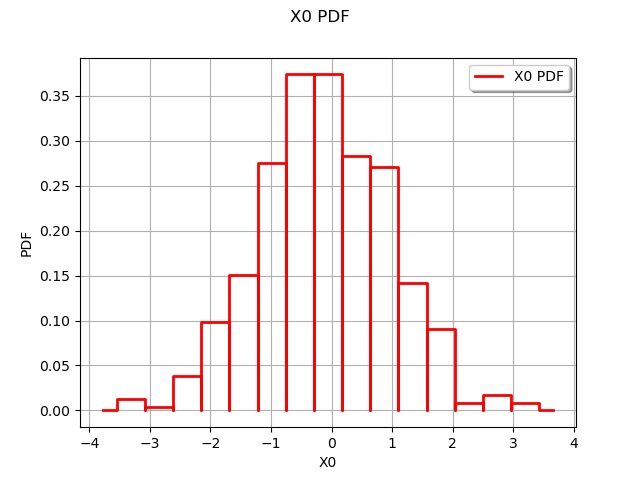

In [171]:
size = 500
normal = ot.Normal(1)
sample = normal.getSample(size)
ot.HistogramFactory().build(sample).drawPDF()

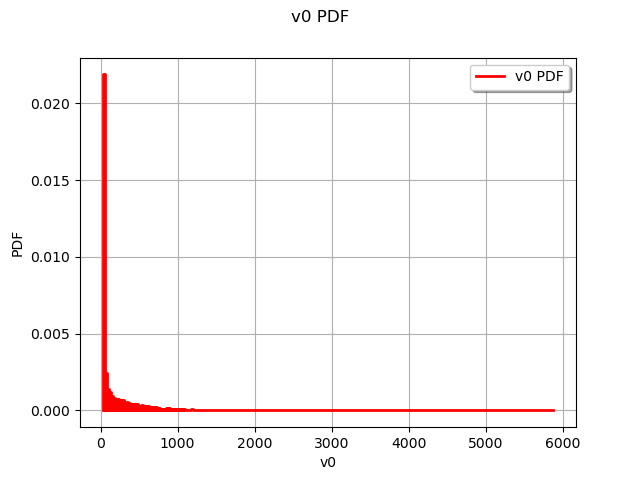

In [172]:
sample = ot.Sample([[x] for x in data])
# needs raw data as input, makes the histogram for you
# i was giving a histogram to a histogram making method...
ot.HistogramFactory().build(sample).drawPDF()

In [173]:
max_precip = [9.4, 38.0, 12.5, 35.3, 17.6, 12.9, 12.4, 19.6, 15.0, 13.2, 12.3, 16.9, 16.9, 29.4, 13.6, 11.1, 8.0, 16.6, 12.0, 13.1, 9.1, 9.7, 21.0, 11.2, 14.4, 18.8, 14.0, 19.9, 12.4, 10.8, 21.6, 15.4, 17.4, 14.8, 22.7, 11.5, 10.5, 11.8, 12.4, 16.6, 11.7, 12.9, 17.8]
sample = ot.Sample([[f] for f in data])
gev = ot.GeneralizedExtremeValueFactory().buildAsGeneralizedExtremeValue(sample)
print(gev)

GeneralizedExtremeValue(mu=55.9286, sigma=24.541, xi=1.35926)


[<Axes: xlabel='X0', ylabel='PDF'>]


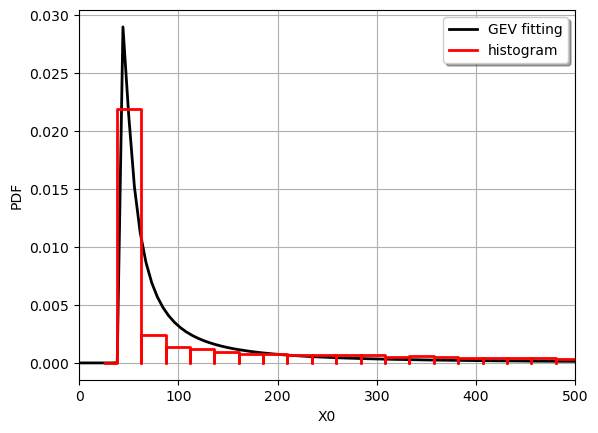

In [175]:
graph = gev.drawPDF()
graph.add(ot.HistogramFactory().build(sample).drawPDF())
graph.setColors(["black", "red"])
graph.setLegends(["GEV fitting", "histogram"])
graph.setLegendPosition("topright")

view = viewer.View(graph)
axes = view.getAxes()
print(axes)
_ = axes[0].set_xlim(0, 500)
# does not look good, what if you used smoothed data?